#  Linear Networks & Basic Optimization

###  **DSBA 6165: AI & Deep Learning**


## Goal

The goal of this lab activity is practicing to build a simple linear network, apply basic optimization and play with autograd tools. For the practice, we use Auto MPG dataset from the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

Along the way, we'll see how to build and train a linear network. Additionally, we will take a look at gradient descent which allows us to iteratively minimize the error (loss) and can help our network the optimal solution (linear). Additionally, we'll look at how we can use a automatic differention manually to understand its underlying behavior.


## Loading Data

Let us first import the libraries we are going to use. TensorFlow for DL models, matplotlib for plotting data/results, numpy and pandas for data handling.

In [94]:
import tensorflow as tf
from tensorflow import keras
from keras import layers
print("TF version:", tf.__version__)

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


TF version: 2.18.0


### Auto-MPG Dataset

You can navigate [UCI auto-mpg data folder](https://archive.ics.uci.edu/ml/datasets/Auto+MPG) to find [auto-mpg.data](https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data). Click the link and take a look at the data before starting to work the following TODOs.


<img src="https://archive.ics.uci.edu/ml/assets/MLimages/Large9.jpg" width=350 />


|  |  |  |  |  |  |
|---|---|---|---|---|---|
| Data Set Characteristics:&nbsp;&nbsp; | Multivariate | Number of Instances: | 398 | Area: | N/A |
| Attribute Characteristics: | Categorical, Real | Number of Attributes: | 8 | Date Donated | 1993-07-07 |
| Associated Tasks: | Regression | Missing Values? | Yes | Number of Web Hits: | 821244 |



The dataset contains the following attributes:

1. mpg: continuous
2. cylinders: multi-valued discrete
3. displacement: continuous
4. horsepower: continuous
5. weight: continuous
6. acceleration: continuous
7. model year: multi-valued discrete
8. origin: multi-valued discrete
9. car name: string (unique for each instance)

Given the other attributes as input feature, we can train the model to predict mpg or hoursepower, etc.


### TODO1

1. Copy the auto-mpg.data url from above and define the variable `data_url`.
1. Load the auto-mpg dataset with the `data_url` provided below and store the output into `dfauto` using pandas `read_csv`.
    1. Hint: Make sure to include the data url variable.
    1. Hint: Use the read_csv reference here: [link](https://pandas.pydata.org/docs/reference/api/pandas.read_csv.html)
    1. Hint: When you load the data, check the file format (delimiter), non-numeric content, etc. to pass a proper parameters. Use options `names`, `na_values`, and `delim_whitespace`.  

In [95]:
# TODO: copy and paste the url here
data_url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'

# Feature names
colnames = ["mpg", "cylinders", "displacement", "horsepower", "weight",
            "acceleration", "model year", "origin", "car name"]

# TODO: read the data
dfauto = pd.read_csv(data_url, delimiter = None, names=colnames, na_values='?', sep='\s+')

# display the dfdauto
display(dfauto)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52.0,2130.0,24.6,82,2,vw pickup
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,dodge rampage
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,ford ranger


    
 ### TODO 1-1

Now we are Dropping the "car name" variable since it's an object which has many unique samples and not meaningfull for our findings
1. Drop the 'car name' variable from dataset using `drop`.
  1. HINT: you can find detailed documentation here :[pandas.DataFrame.drop](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.drop.html)

In [96]:
# TODO:
df_data = dfauto.drop(['car name'], axis=1)
df_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


<Add sentences to explain>

Now we have dropped the 'car name' input. Now we should check whether the dataset contains any missing or improper values. We can use `isna` which return boolean values for the NA (or NaN, not a number) entries. `sum` function helps us count the number of NA values.


In [97]:
df_data.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model year      0
origin          0
dtype: int64

We are able to see six NA samples in the "horsepower" variable. Let's what samples they are:

In [98]:
df_data[df_data['horsepower'].isna()]

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
32,25.0,4,98.0,NaN,2046.0,19.0,71,1
126,21.0,6,200.0,NaN,2875.0,17.0,74,1
330,40.9,4,85.0,NaN,1835.0,17.3,80,2
336,23.6,4,140.0,NaN,2905.0,14.3,80,1
354,34.5,4,100.0,NaN,2320.0,15.8,81,2
374,23.0,4,151.0,NaN,3035.0,20.5,82,1


We now need to remove the NaN values from the dataset because machine learning algorithms cannot handle non-numerical values. Additionally, it may be challenging to visualize or understand the data when a dataset contains NaN values. Analyses can be made clearer and more precise by eliminating NaN values. Of course, there are other ways to handle this other than simple removal. If you are interested in more data preprocessing methods to handling missing values, you can review Applied Machine Learning class.


 ### TODO 1-2
1. Remove the data samples with NAs by using `dropna`. You can refer to this link for reference: [pandas.DataFrame.dropna](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [99]:
# TODO:
df_data = df_data.dropna(subset=['horsepower'])
df_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,1
1,15.0,8,350.0,165.0,3693.0,11.5,70,1
2,18.0,8,318.0,150.0,3436.0,11.0,70,1
3,16.0,8,304.0,150.0,3433.0,12.0,70,1
4,17.0,8,302.0,140.0,3449.0,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1
394,44.0,4,97.0,52.0,2130.0,24.6,82,2
395,32.0,4,135.0,84.0,2295.0,11.6,82,1
396,28.0,4,120.0,79.0,2625.0,18.6,82,1


In [100]:
df_data[df_data['horsepower'].isna()].sum()

mpg             0.0
cylinders       0.0
displacement    0.0
horsepower      0.0
weight          0.0
acceleration    0.0
model year      0.0
origin          0.0
dtype: float64

Now we are mapping `origin` variable values to individual categorical so It can make easier to understand the data and perform further analysis, Using map function to replace these numerical values with their corresponding category names.

In [101]:
df_data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: origin, Length: 392, dtype: object

The previous cell does show how map works without actually updating the column. Now let us update the origin to categorical variables of USA,EUROPE and JAPAN.


In [102]:
df_data = df_data.copy(deep=True)
df_data['origin'] = df_data['origin'].map({1: 'USA', 2: 'Europe', 3: 'Japan'})

In [103]:
df_data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
0,18.0,8,307.0,130.0,3504.0,12.0,70,USA
1,15.0,8,350.0,165.0,3693.0,11.5,70,USA
2,18.0,8,318.0,150.0,3436.0,11.0,70,USA
3,16.0,8,304.0,150.0,3433.0,12.0,70,USA
4,17.0,8,302.0,140.0,3449.0,10.5,70,USA


Most of the algorithms can not handle non-numerical variables unless we convert them to numerical values. Many algorithm’s performances vary based on how Categorical variables are encoded. Then, why do we need to convert numerical values to characters? Let us review dummy values.


Dummy Encoding (a.k.a. one hot encoding) refers to an encoding strategy to convert a categorical feature to a numerical vector format.
In this method, we map each category to a binary vector that contains the numbers 1 and 0, signifying whether the feature is present or not. The number of feature categories affects how many vectors there are. When we have `origin` has 1, 2, and 3 for cars from USA, EUROPE, and JAPAN, relation between these number can cause an issue. For instance, 2 > 1, so EUROPE > USA. What does that mean. USA cars are closer (2-1) to EUROPE than JAPAN (3-1)? Breaking this releation with dummy variables is very helpful to boost learning as Yan Lecun discussed in [Efficient Backprop paper](https://cseweb.ucsd.edu/classes/wi08/cse253/Handouts/lecun-98b.pdf).


`pd.get_dummies` is a function from Pandas that performs dummy encoding in a single line of code. You can find detailed documentation here: [pandas.get_dummies](https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html)

### TODO 1-3

1. Convert the column 'origin' to dummy variables.
  1. Hint: Don't forget to use prefix and prefix seperator to have same column names. Refer to the above link if you need.

In [104]:
# TODO:
df_data = pd.get_dummies(df_data, columns=['origin'])
df_data

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Europe,origin_Japan,origin_USA
0,18.0,8,307.0,130.0,3504.0,12.0,70,False,False,True
1,15.0,8,350.0,165.0,3693.0,11.5,70,False,False,True
2,18.0,8,318.0,150.0,3436.0,11.0,70,False,False,True
3,16.0,8,304.0,150.0,3433.0,12.0,70,False,False,True
4,17.0,8,302.0,140.0,3449.0,10.5,70,False,False,True
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,False,False,True
394,44.0,4,97.0,52.0,2130.0,24.6,82,True,False,False
395,32.0,4,135.0,84.0,2295.0,11.6,82,False,False,True
396,28.0,4,120.0,79.0,2625.0,18.6,82,False,False,True


## Visualize the data
 Seaborn, a visualization library, helps to visualize data with many plotting functions. To understand how variables in a dataset are related to one another and how that relationship is dependent on other variables, we can run visual analysis. This helps to visualize the trends and identify various patterns in the dataset.

### TODO 2
1. Using the seaborn `pairplot` plot, visualize the relationship between the following varaibles ('mpg', 'cylinder', 'horsepower', 'weight', 'acceleration') using diag_kind as kernel density estimation "kde".

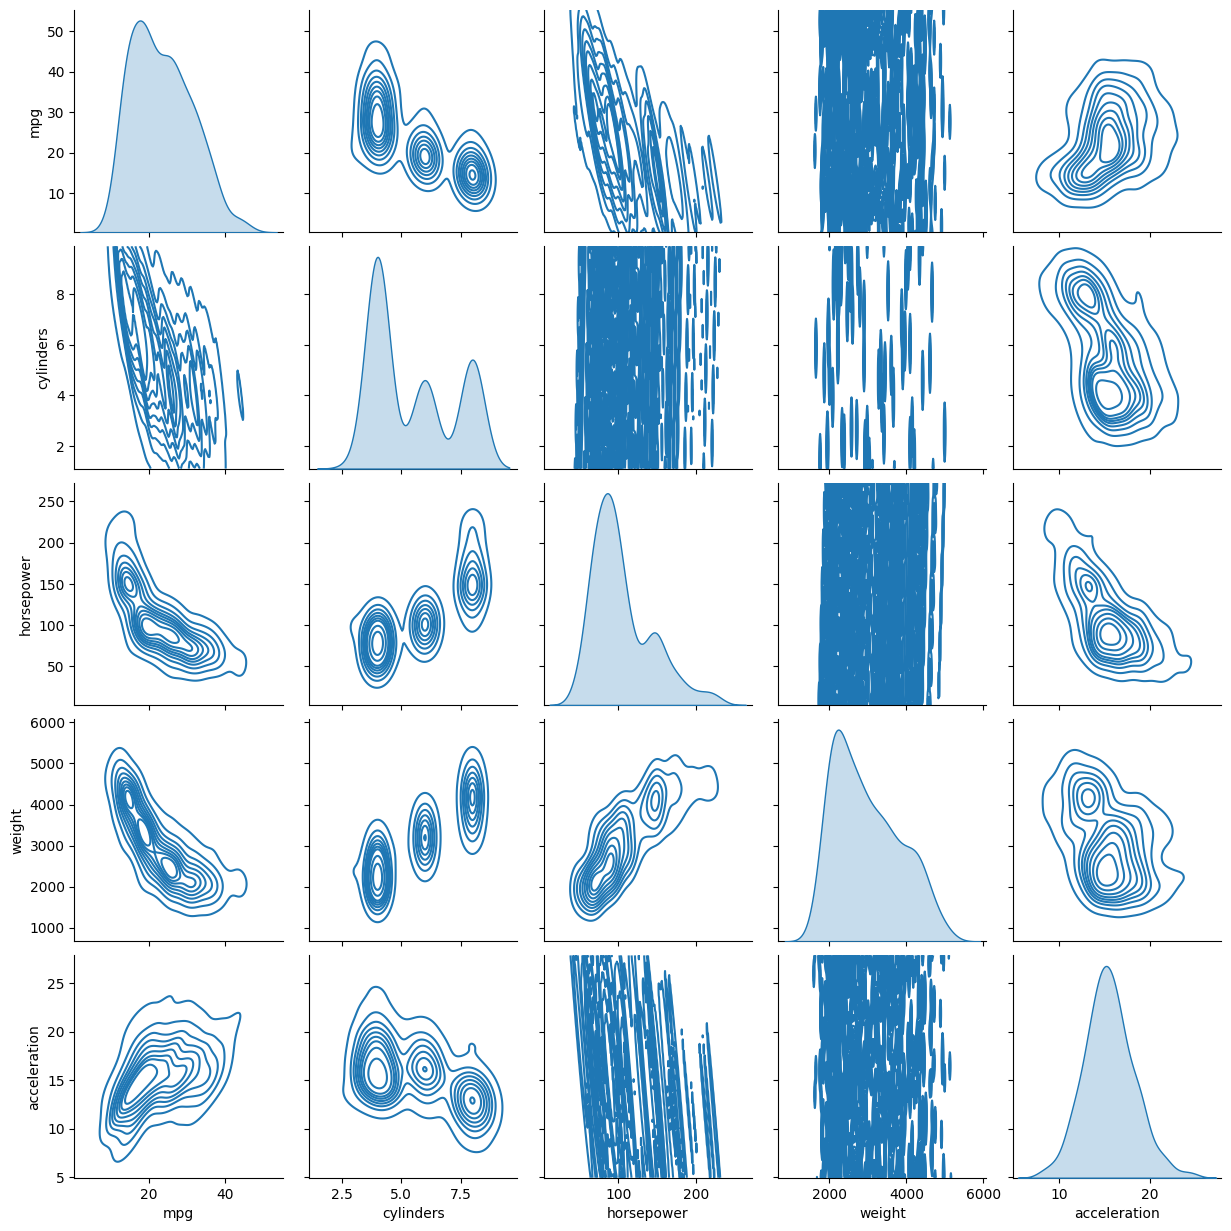

In [105]:
# TODO: you code here
sns.pairplot(df_data, vars=['mpg', 'cylinders', 'horsepower', 'weight', 'acceleration'], kind = 'kde')

## Data Split




Now we have to split the training and testing data because it allows us to estimate the model's performance on new data and ensure that the model is not overfitting, which is when a model performs well on the training data but poorly on new data. By evaluating the model's performance on unseen data, we can get a better understanding of how well the model will perform when used in practice.

In [106]:
train_data = df_data.sample(frac=0.8, random_state=0)#Splitting the data(80% for training and 20% for testing)
test_data = df_data.drop(train_data.index)

In [107]:
train_data.shape, test_data.shape

((314, 10), (78, 10))

The 'mpg' column is eliminated using the `pop` method. Refer to this link for `pop` method.[Link](https://python-reference.readthedocs.io/en/latest/docs/list/pop.html).
The reason for removing the output variable is we are essentially creating a dataset that only contains the input features, and not the target variable, for the testing set.
This is usually done when evaluating the performance of a model.

In [108]:
x_train = train_data.copy()
x_test = test_data.copy()

y_train = x_train.pop('mpg')
y_test = x_test.pop('mpg')

In [109]:
display(x_train)
display(x_test)
display(y_train)
display(y_test)

,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Europe,origin_Japan,origin_USA
146,4,90.0,75.0,2125.0,14.5,74,False,False,True
282,4,140.0,88.0,2890.0,17.3,79,False,False,True
69,8,350.0,160.0,4456.0,13.5,72,False,False,True
378,4,105.0,63.0,2125.0,14.7,82,False,False,True
331,4,97.0,67.0,2145.0,18.0,80,False,True,False
...,...,...,...,...,...,...,...,...,...
281,6,200.0,85.0,2990.0,18.2,79,False,False,True
229,8,400.0,180.0,4220.0,11.1,77,False,False,True
150,4,108.0,93.0,2391.0,15.5,74,False,True,False
145,4,83.0,61.0,2003.0,19.0,74,False,True,False


,cylinders,displacement,horsepower,weight,acceleration,model year,origin_Europe,origin_Japan,origin_USA
9,8,390.0,190.0,3850.0,8.5,70,False,False,True
25,8,360.0,215.0,4615.0,14.0,70,False,False,True
28,8,304.0,193.0,4732.0,18.5,70,False,False,True
31,4,113.0,95.0,2228.0,14.0,71,False,True,False
33,6,232.0,100.0,2634.0,13.0,71,False,False,True
...,...,...,...,...,...,...,...,...,...
369,4,112.0,88.0,2395.0,18.0,82,False,False,True
375,4,105.0,74.0,1980.0,15.3,82,True,False,False
382,4,108.0,70.0,2245.0,16.9,82,False,True,False
384,4,91.0,67.0,1965.0,15.7,82,False,True,False


146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
281    19.8
229    16.0
150    26.0
145    32.0
182    28.0
Name: mpg, Length: 314, dtype: float64

9      15.0
25     10.0
28      9.0
31     25.0
33     19.0
       ... 
369    34.0
375    36.0
382    34.0
384    32.0
396    28.0
Name: mpg, Length: 78, dtype: float64

## Normalization

When variables are measured at different scales, they often do not contribute equally to the analysis. By normalizing the variables, we can be sure that each variable contributes equally to the analysis. Standardization is a way to normalize the data as
$$ \tilde{x} = \frac{(x - \mu)}{\sigma}$$
where $x$ is the input data, $\mu$ is the mean value of the data, $\sigma$ is the standard deviation of the data, and $\tilde{x}$ is the normalized data.

We can use Keras normalization layer for this processing. See [keras website](https://keras.io/api/layers/preprocessing_layers/numerical/normalization/) for your reference.



The `describe` function returns the statistical summary of the dataframe or series. This includes count, mean, median (or 50th percentile) standard deviation, min-max, and percentile values of columns. To perform this function, chain .describe() to the dataframe. We transpose the output to show only mean and std.

In [110]:
df_data.describe().transpose()[['mean','std']]

,mean,std
mpg,23.445918,7.805007
cylinders,5.471939,1.705783
displacement,194.411990,104.644004
horsepower,104.469388,38.491160
weight,2977.584184,849.402560
acceleration,15.541327,2.758864
model year,75.979592,3.683737


In above cell we can see the scalability of each variable where `Europe` having the least mean and `weight` having the highest mean. If features have significantly different ranges, some features may dominate others during training.
Therefore, rescaling the data to similar scale with noramlization helps learning. Now let us practice normalization as below.


### TODO 3

1. Create `normalizer` instance using keras `Normalization` object. (HINT: use axis=-1).
1. Use `adapt` to learn normalization mean and standard deviations of `x_train`.
  1. HINT: You need to convert pd.Dataframe `x_train` into numpy array.
   

In [111]:
# TODO:
normalizer = keras.layers.Normalization(axis=-1)

In [112]:
# TODO:
adapt_data = np.array(x_train)
normalizer.adapt(adapt_data)

In [113]:
normalizer.mean.numpy()

array([[5.4777069e+00, 1.9531847e+02, 1.0486943e+02, 2.9902517e+03,
        1.5559236e+01, 7.5898087e+01, 1.7834395e-01, 1.9745223e-01,
        6.2420380e-01]], dtype=float32)

In [114]:
normalizer.adapt_variance

<Variable path=normalization_1/variance, shape=(9,), dtype=float32, value=[2.8800762e+00 1.0850414e+04 1.4466995e+03 7.0989681e+05 7.7550263e+00
 1.3467321e+01 1.4653738e-01 1.5846485e-01 2.3457341e-01]>

After applying normalizer we can now notice that both mean and varaince of all variables lies in similar scale

You can pull out one sample data from training data `x_train` as below.

In [115]:
first_sample = x_train[:1]

### TODO 3-1

1. Apply `normalizer` to the first sample in `x_train` and check if input data are properly converted.

In [116]:
# TODO: #your code here
first_sample = normalizer.call(first_sample)
print(first_sample)

tf.Tensor(
[[-0.87073565 -1.0110704  -0.78530395 -1.0269395  -0.3803653  -0.5172201
  -0.46589085 -0.49601588  0.77591294]], shape=(1, 9), dtype=float32)


## Linear Networks

[Sequential](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential) allows for stacking layers. We can build a linear model using keras `Sequential` object, which means that it is a linear stack of layers, where you can use the add() method to add a layer to the model (or by passing list of your stacked model).
The first layer of the model is `normalizer` that we created above to normalize input data.
The second layer is a `Dense` output layer with a single hidden unit to produce one output value. A `Dense` layer is a fully-connected layer, where all the units in the previous layer are connected to all the units in the current layer. The number of units in a Dense layer is specified by the units argument. In this case, the Dense layer has a single unit, which means that it is a linear model.

### TODO 4
1. Create `linear_model` using `Sequential` with `normalizer` and `Dense` layers. We need to make the linear model to produce one output value.


In [117]:
# TODO:
linear_model = keras.Sequential([
    normalizer, 
    keras.layers.Dense(1)
])

Compiling the model

In [118]:
linear_model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_squared_error'
)

x_train = x_train.astype('float32')

The predict( ) method of a TensorFlow keras model takes an array of examples as input and returns the model's predictions for those examples. In this case, x_train[:5] is a slice of the training data containing the first 5 examples, and the model's predictions for these examples will be returned as an array.

In [119]:
linear_model.predict(x_train[:5])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step


array([[ 1.5232011 ],
       [ 0.64288735],
       [-1.5969886 ],
       [ 1.4379303 ],
       [ 1.0701095 ]], dtype=float32)

Comparing the output to the actual target `mpg`,

In [120]:
y_train[:5]

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
Name: mpg, dtype: float64

As you know, this model is yet trained, so having weird outputs (negative mpg?) makes sense.

In [121]:
x_train.shape

(314, 9)

We can see what weight and bias the linear model have by looking and `kernel` and `bias` as below:

In [122]:
linear_model.layers[1].kernel #these are random weights

<Variable path=sequential_4/dense_3/kernel, shape=(9, 1), dtype=float32, value=[[-0.38540134]
 [-0.7269209 ]
 [-0.54472494]
 [ 0.22436446]
 [-0.4722568 ]
 [-0.0543741 ]
 [-0.17103976]
 [ 0.0610162 ]
 [-0.00243592]]>

In [123]:
linear_model.layers[1].bias #bias

<Variable path=sequential_4/dense_3/bias, shape=(1,), dtype=float32, value=[0.]>

## Compile
Compiling a model is required to finalise the model and make it completely ready to use.
For compilation, we need to specify an optimizer and a loss function.
We can compile a model by using the following attribute. Let us first look at its parameters before using it.
1. `optimizer`: we pass the optimizer we want to use. keras implements various optimizers including SGD, Adam, etc.,
2. `loss`: we define a loss function (objective function) for optimization,
3. `metrics`: we define the metric on which we want the model to be scored.


### TODO4-1
1. Using `compile`, prepare your model to have `SGD` as an `optimizer` with `learning_rate` 0.1 and have a loss function to be 'mean_absolute_error'.

In [124]:
# TODO:
linear_model = keras.Sequential([
    normalizer, 
    keras.layers.Dense(1)
])

linear_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    loss='mean_absolute_error'
)

x_train = x_train.astype('float32')


### TODO4-2
1. Using `fit`, train the model with training data (`x_train` and `y_train`). Train the model for `300 epochs` keeping `verbose` turned off (0), and `validation_split` be 20%.

In [125]:
# Use time to calculate the time it takes to run this cell
# let us keep this for us to figure out training time.
import time
start_time = time.time()

# TODO:
history = linear_model.fit(
    x_train, 
    y_train, 
    epochs=300, 
    verbose=False, 
    validation_split=0.2)

end_time = time.time()
training_time = end_time-start_time

We stored the training output in `history`. Now let us observe the learning curve by plotting the training and validation loss.

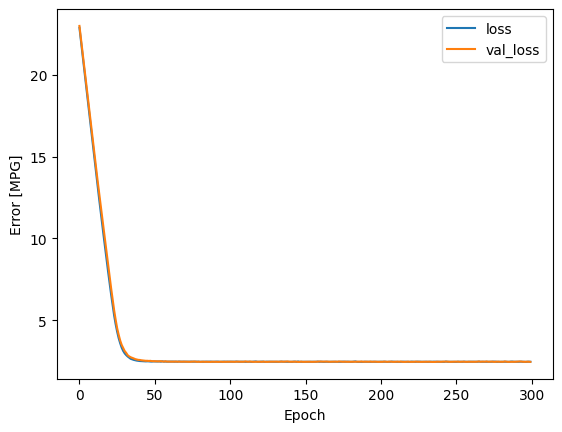

In [126]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

### TODO4-3
1. `evaluate` the model on test data (`x_test` and `y_test`).

In [133]:
# TODO:
x_test = x_test.astype('float32')
y_test = y_test.astype('float32')

test_loss = linear_model.evaluate(
    x=x_test,
    y=y_test,
    verbose=1
)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 2.3908


## Going Deep

### TODO 5
1. Now  build a neural network `deep_model` with two hidden layers and one output layer as described below:
  1. The first layer of the model should be your `normalizer` as the `linear_model`, This layer normalizes the input data.
  1. Add two hidden layer ([Dense](https://www.tensorflow.org/api_docs/python/tf/keras/layers/Dense)) with 64 hidden units (neurons) and ReLU activation function for nonlinear transformation.
  1. Add a output layer that produces 1 output value.  
1. `compile` the model you have built keeping `SGD` as an `optimizer` with `learning_rate` 0.1 and have a loss function to be 'mean_absolute_error'.
1. Now training the model using `fit`. You can refer to the training cell for `linear_model` if need.
1. Evaluate the model with test data.

In [135]:
# TODO:
deep_model = keras.Sequential([
    normalizer, 
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(1)
])

# TODO:
deep_model.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.1),
    loss='mean_absolute_error'
)

# TODO:
test_loss = deep_model.evaluate(
    x=x_test,
    y=y_test,
    verbose=1
)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 22.1289 


#### Note: Learning rate:
The learning rate determines how fast the optimizer will adjust the weights and can be an important hyperparameter to tune. A lower learning rate may result in a more accurate model but will take longer to train, while a higher learning rate may train faster but may diverge. After building the network, you can play with it see how well it learns with a specific learning rate.


In [136]:
# TODO:

history = deep_model.fit(
    x_train, 
    y_train, 
    epochs=300, 
    verbose=False, 
    validation_split=0.2)



Now let us visualize the learning curve to observe how it learns.

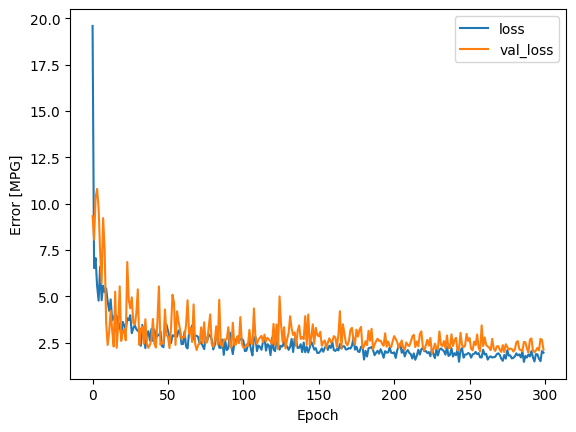

In [137]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [MPG]')
plt.legend()

In [143]:
#TODO:
## Trying different learning rates: 

def train_model(learning_rate):
    # Create model with same architecture
    model = keras.Sequential([
        normalizer,
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(64, activation='relu'),
        keras.layers.Dense(1)
    ])
    
    # Compile with different learning rate
    model.compile(
        optimizer=keras.optimizers.SGD(learning_rate=learning_rate),
        loss='mean_absolute_error'
    )
    
    # Train model
    history = model.fit(
        x_train,
        y_train,
        epochs=300,
        verbose=0,
        validation_split=0.2
    )
    
    # Evaluate
    test_loss = model.evaluate(x_test, y_test, verbose=0)
    
    return history, test_loss

# Try different learning rates
learning_rates = [0.001, 0.01, 0.03]
results = {}

for lr in learning_rates:
    print(f"\nTraining with learning rate: {lr}")
    history, test_loss = train_model(lr)
    results[lr] = {
        'history': history,
        'test_loss': test_loss
    }
    print(f"Test loss: {test_loss:.4f}")


Training with learning rate: 0.001
Test loss: 1.7209

Training with learning rate: 0.01
Test loss: 1.8084

Training with learning rate: 0.03
Test loss: 2.1145


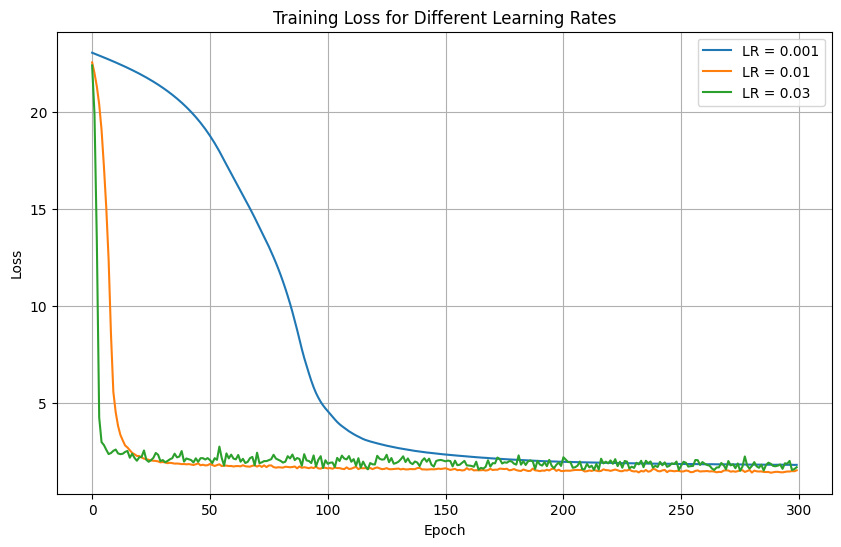

In [144]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
for lr in learning_rates:
    plt.plot(results[lr]['history'].history['loss'], label=f'LR = {lr}')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss for Different Learning Rates')
plt.legend()
plt.grid(True)
plt.show()

## Automatic Differentiation



Automatic differentiation computes the gradients for diverse complex neural network functions. We can play with simple function $y=2x^2 + 3x$ and derive the first and second order derivatives as below:

In [138]:
x = tf.range(5, dtype=tf.float32)
x = tf.Variable(x)

with tf.GradientTape() as gg:
    with tf.GradientTape() as g:
        y = 2*x*x + 3*x   ## (A)
    dy_dx = g.gradient(y, x)
d2y_d2x = gg.gradient(dy_dx, x)


The first derivative is $y^\prime = 4x+3$ so the evaluation for $x = {0,1,2,3,4}$ should match.  

In [139]:
dy_dx

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([ 3.,  7., 11., 15., 19.], dtype=float32)>

Let us check the second order $y^{\prime \prime} = 4$ now for $x = {0,1,2,3,4}$.

In [140]:
d2y_d2x

<tf.Tensor: shape=(5,), dtype=float32, numpy=array([4., 4., 4., 4., 4.], dtype=float32)>

### TODO 6
1. Define your own function $y$. Refering the code above, compute first order derivative and validate automatic differentiation with the example inputs $x={0,1,2,3,4}.

In [ ]:
# TODO:

x = tf.range(5, dtype=tf.float32)
x = tf.Variable(x)


with tf.GradientTape() as g:
    y = 2*x*x + 3*x  # f(x) = 2x² + 3x
dy_dx = g.gradient(y, x)

print("Input x:", x.numpy())
print("First derivative dy/dx:", dy_dx.numpy())

# Validation
x_numpy = x.numpy()
analytical_derivative = 4*x_numpy + 3

print("\nAnalytical derivative:", analytical_derivative)
print("Are they equal: t/f?", tf.reduce_all(tf.abs(dy_dx - analytical_derivative) < 1e-6).numpy())


Input x: [0. 1. 2. 3. 4.]
First derivative dy/dx: [ 3.  7. 11. 15. 19.]

Analytical derivative: [ 3.  7. 11. 15. 19.]
Are they equal? True
